# Importing Libraries

In [1]:
import numpy as np                  #For mathematical calculations 
import pandas as pd                 #for working with data sets
import matplotlib.pyplot as plt     #For plotting graphs
import seaborn as sns               #For data visualization
import warnings 
warnings.filterwarnings('ignore')   #For ignoring warnings

## Load csv data to Pandas dataframe and display the header

In [2]:
df = pd.read_csv("train_loan1.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Visualization

<Axes: xlabel='Credit_History', ylabel='count'>

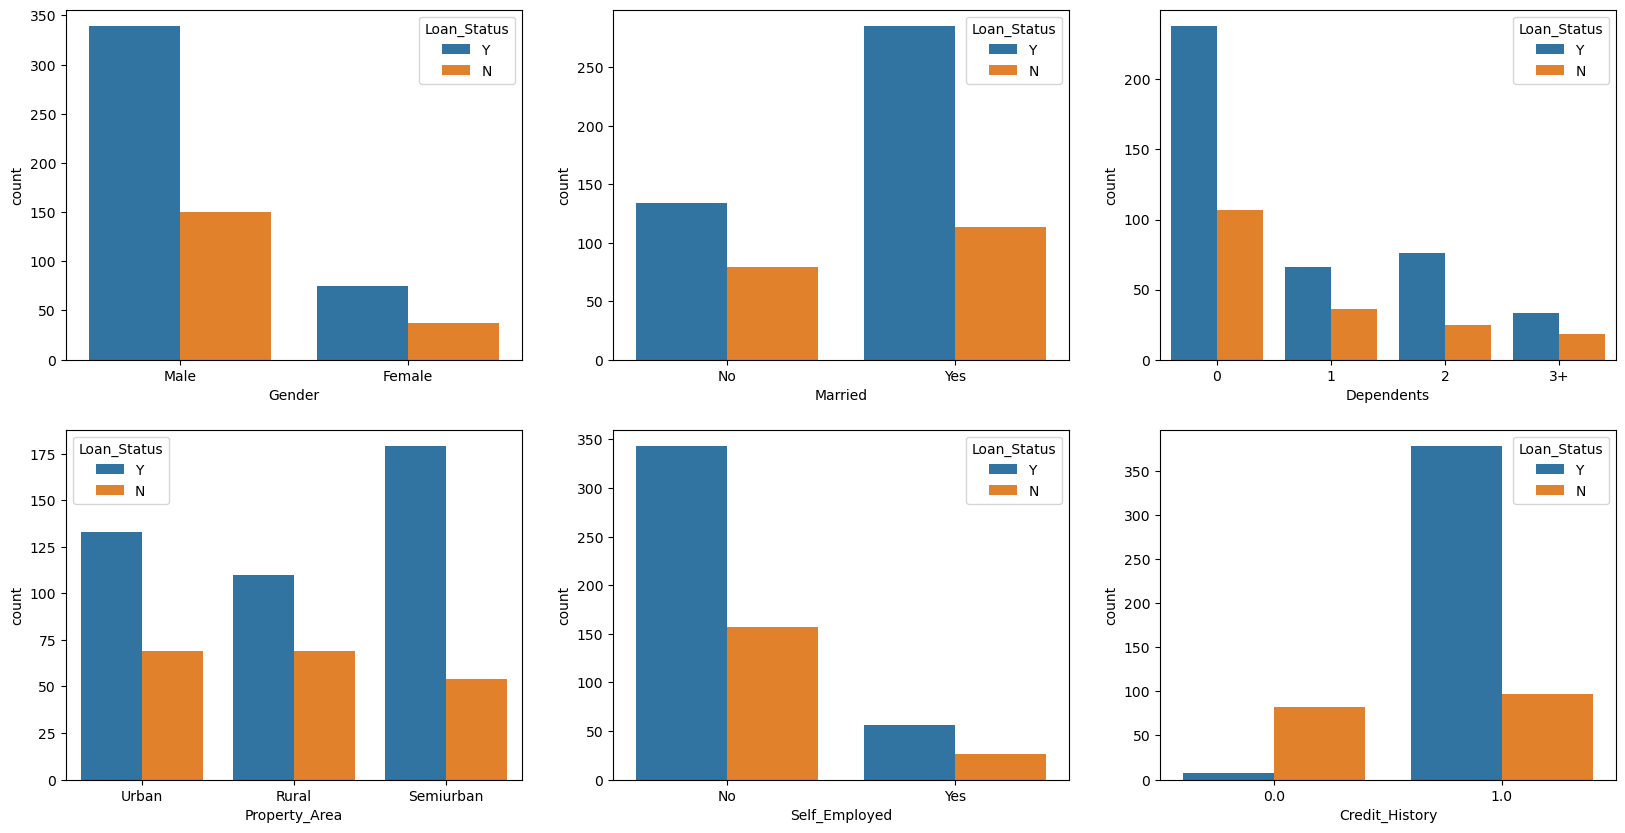

In [7]:
fig,ax = plt.subplots(figsize=(20,10),ncols=3,nrows=2)
sns.countplot(x="Gender",hue="Loan_Status",data=df,ax=ax[0][0])
sns.countplot(x="Married",hue="Loan_Status",data=df,ax=ax[0][1])
sns.countplot(x="Dependents",hue="Loan_Status",data=df,ax=ax[0][2])
sns.countplot(x="Property_Area",hue="Loan_Status",data=df,ax=ax[1][0])
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df, ax=ax[1][1])
sns.countplot(x="Credit_History",hue="Loan_Status",data=df, ax=ax[1][2])

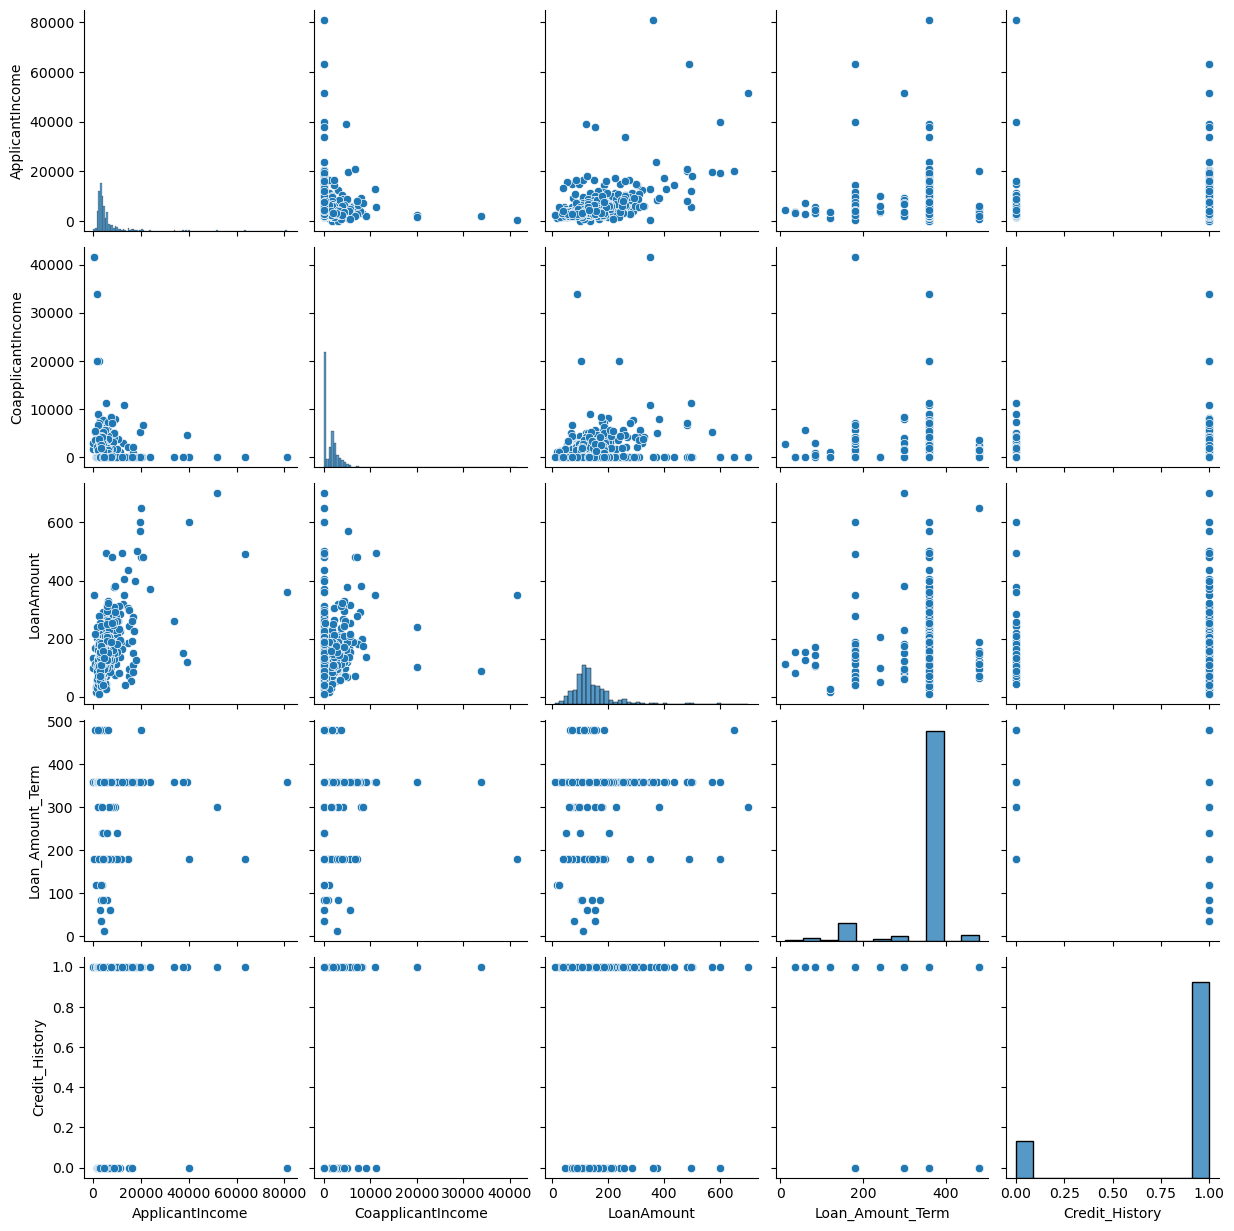

In [8]:
sns.pairplot(df)
plt.show()

# Handling Missing Values

In [9]:
#missing value
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [11]:
df['Gender'] = df['Gender'].fillna('Male')

In [12]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [13]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [14]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [15]:
#append the dependents using a Dictionary

df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [16]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [17]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [18]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [19]:
#Feature Engineering
# Creating a column called Total Income
# Adding up the Applicant and Co-applicants income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [20]:
# Dropping Loan ID column
df.drop('Loan_ID', axis=1, inplace=True)

In [21]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [22]:
df.head() 

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0.0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


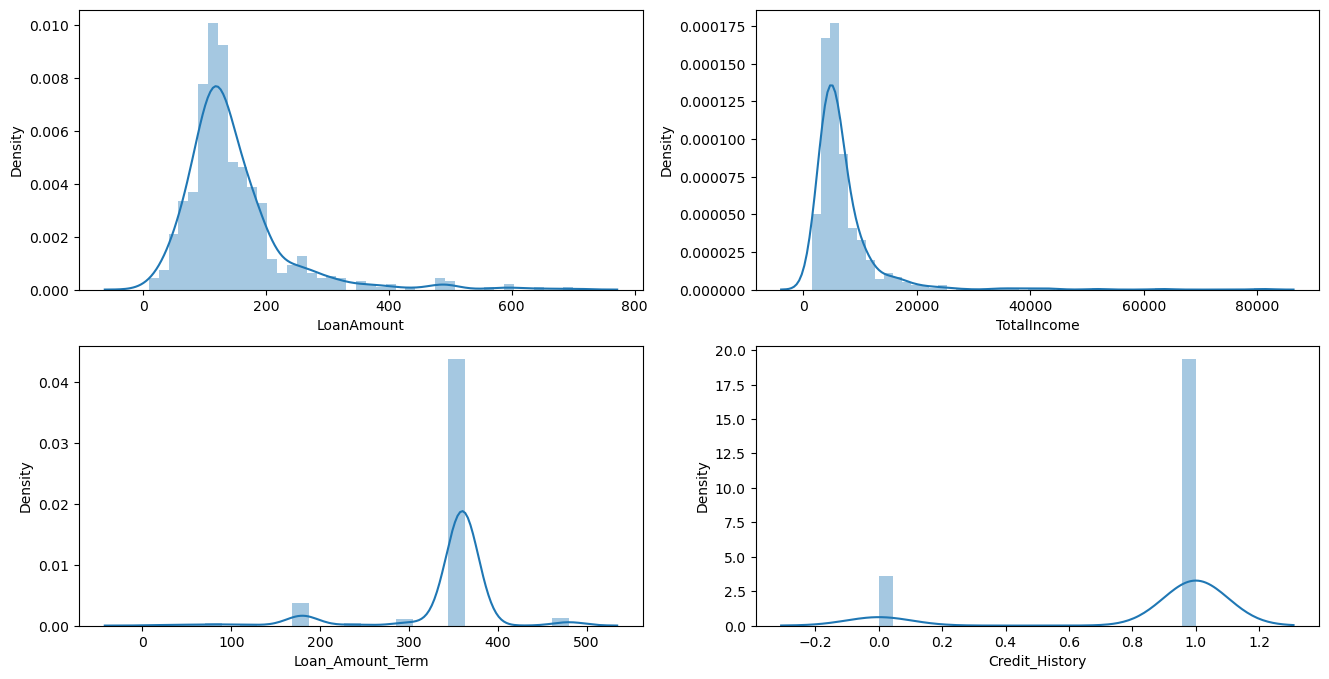

In [23]:
#Histogram
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['LoanAmount'])
plt.subplot(2,2,2)
sns.distplot(df['TotalIncome'])
plt.subplot(2,2,3)
sns.distplot(df['Loan_Amount_Term'])
plt.subplot(2,2,4)
sns.distplot(df['Credit_History'])
plt.show()

In [24]:
df['TotalIncome'].value_counts()

TotalIncome
6000.0     5
3750.0     4
4583.0     4
2500.0     4
8334.0     3
          ..
4923.0     1
5100.0     1
11000.0    1
6232.0     1
7583.0     1
Name: count, Length: 554, dtype: int64

In [25]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [26]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [27]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [28]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [29]:
df.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
TotalIncome         0
dtype: int64

In [30]:
df.dtypes

Gender               object
Married              object
Dependents          float64
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
TotalIncome         float64
dtype: object

# Handling Outliers

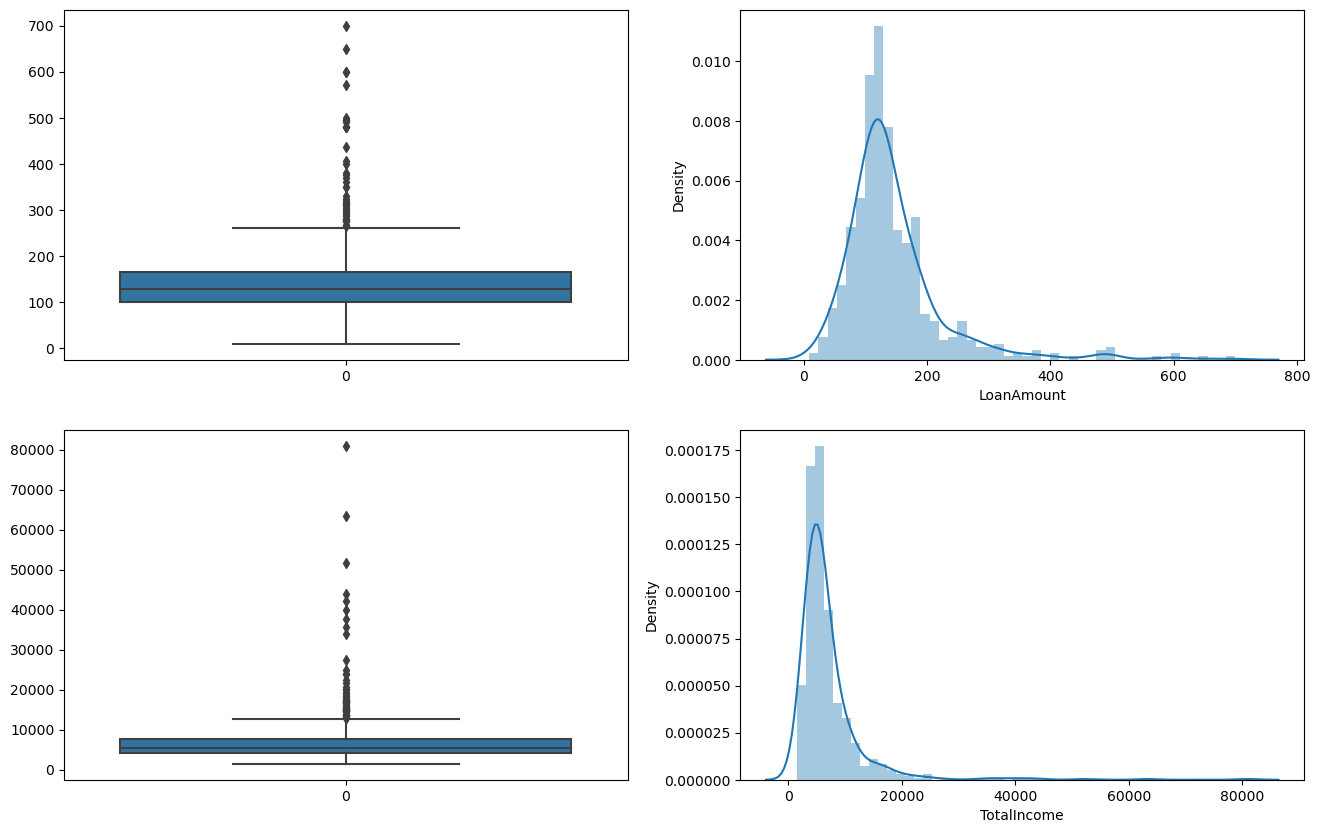

In [31]:
#Identifying Outliers with Visualization
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.boxplot(df['LoanAmount'])
plt.subplot(2,2,2)
sns.distplot(df['LoanAmount'])
plt.subplot(2,2,3)
sns.boxplot(df['TotalIncome'])
plt.subplot(2,2,4)
sns.distplot(df['TotalIncome'])
plt.show()

In [32]:
#Quantile-based Flooring and Capping on LoanAmount
print(df['LoanAmount'].quantile(0.10))
print(df['LoanAmount'].quantile(0.90))

72.30000000000001
229.4000000000001


In [33]:
df["LoanAmount"] = np.where(df["LoanAmount"] <72.30, 72.30,df['LoanAmount'])
df["LoanAmount"] = np.where(df["LoanAmount"] >229.40, 229.40,df['LoanAmount'])
print(df['LoanAmount'].skew())

0.6054478885219593


In [34]:
#Quantile-based Flooring and Capping on TotalIncome
print(df['TotalIncome'].quantile(0.10))
print(df['TotalIncome'].quantile(0.90))

3245.8
11462.800000000007


In [35]:
df["TotalIncome"] = np.where(df["TotalIncome"] <3245.8, 3245.8,df['TotalIncome'])
df["TotalIncome"] = np.where(df["TotalIncome"] >11462.80, 11462.80,df['TotalIncome'])
print(df['TotalIncome'].skew())

0.8789974086078624


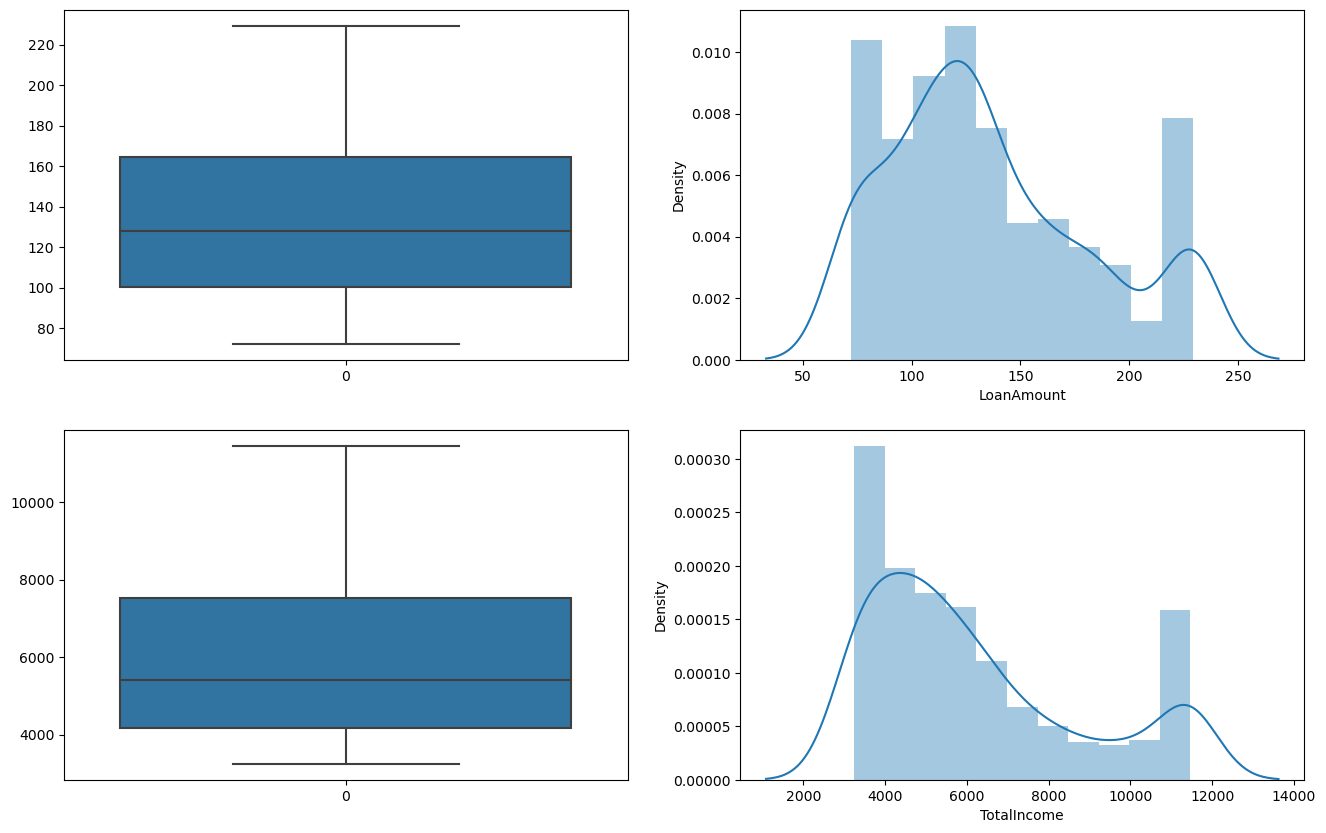

In [36]:
#After removing Outliers 
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.boxplot(df['LoanAmount'])
plt.subplot(2,2,2)
sns.distplot(df['LoanAmount'])
plt.subplot(2,2,3)
sns.boxplot(df['TotalIncome'])
plt.subplot(2,2,4)
sns.distplot(df['TotalIncome'])
plt.show()

# Encoding

In [37]:
df.dtypes

Gender               object
Married              object
Dependents          float64
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
TotalIncome         float64
dtype: object

In [38]:
# Performing Label encoding on Gender, Married, Education, Self Employed, Property area and loan status

from sklearn.preprocessing import LabelEncoder
var_col1 = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le1 = LabelEncoder()
for i in var_col1:
    df[i] = le1.fit_transform(df[i])

In [39]:
df.dtypes

Gender                int32
Married               int32
Dependents          float64
Education             int32
Self_Employed         int32
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int32
Loan_Status           int32
TotalIncome         float64
dtype: object

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0.0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1.0,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0.0,0,1,72.3,360.0,1.0,2,1,3245.8
3,1,1,0.0,1,0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0.0,0,0,141.0,360.0,1.0,2,1,6000.0


In [41]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [42]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0.0,0,0,128.0,360.0,1.0,2,5849.0
1,1,1,1.0,0,0,128.0,360.0,1.0,0,6091.0
2,1,1,0.0,0,1,72.3,360.0,1.0,2,3245.8
3,1,1,0.0,1,0,120.0,360.0,1.0,2,4941.0
4,1,0,0.0,0,0,141.0,360.0,1.0,2,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,72.3,360.0,1.0,0,3245.8
610,1,1,3.0,0,0,72.3,180.0,1.0,0,4106.0
611,1,1,1.0,0,0,229.4,360.0,1.0,2,8312.0
612,1,1,2.0,0,0,187.0,360.0,1.0,2,7583.0


# Feature Scaling

In [43]:
cols = ['LoanAmount', 'Loan_Amount_Term', 'TotalIncome']

In [44]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [45]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0.0,0,0,-0.177604,0.273231,1.0,2,-0.118202
1,1,1,1.0,0,0,-0.177604,0.273231,1.0,0,-0.025064
2,1,1,0.0,0,1,-1.362687,0.273231,1.0,2,-1.120088
3,1,1,0.0,1,0,-0.347814,0.273231,1.0,2,-0.467661
4,1,0,0.0,0,0,0.098986,0.273231,1.0,2,-0.060087
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,-1.362687,0.273231,1.0,0,-1.120088
610,1,1,3.0,0,0,-1.362687,-2.522836,1.0,0,-0.789025
611,1,1,1.0,0,0,1.979800,0.273231,1.0,2,0.829726
612,1,1,2.0,0,0,1.077690,0.273231,1.0,2,0.549158


# Building Models with Ensemble techniques

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
print('Decision Tree : {:,.2f}%'.format(clf.score(X_test,y_test)*100))

Decision Tree : 71.54%


<function matplotlib.pyplot.show(close=None, block=None)>

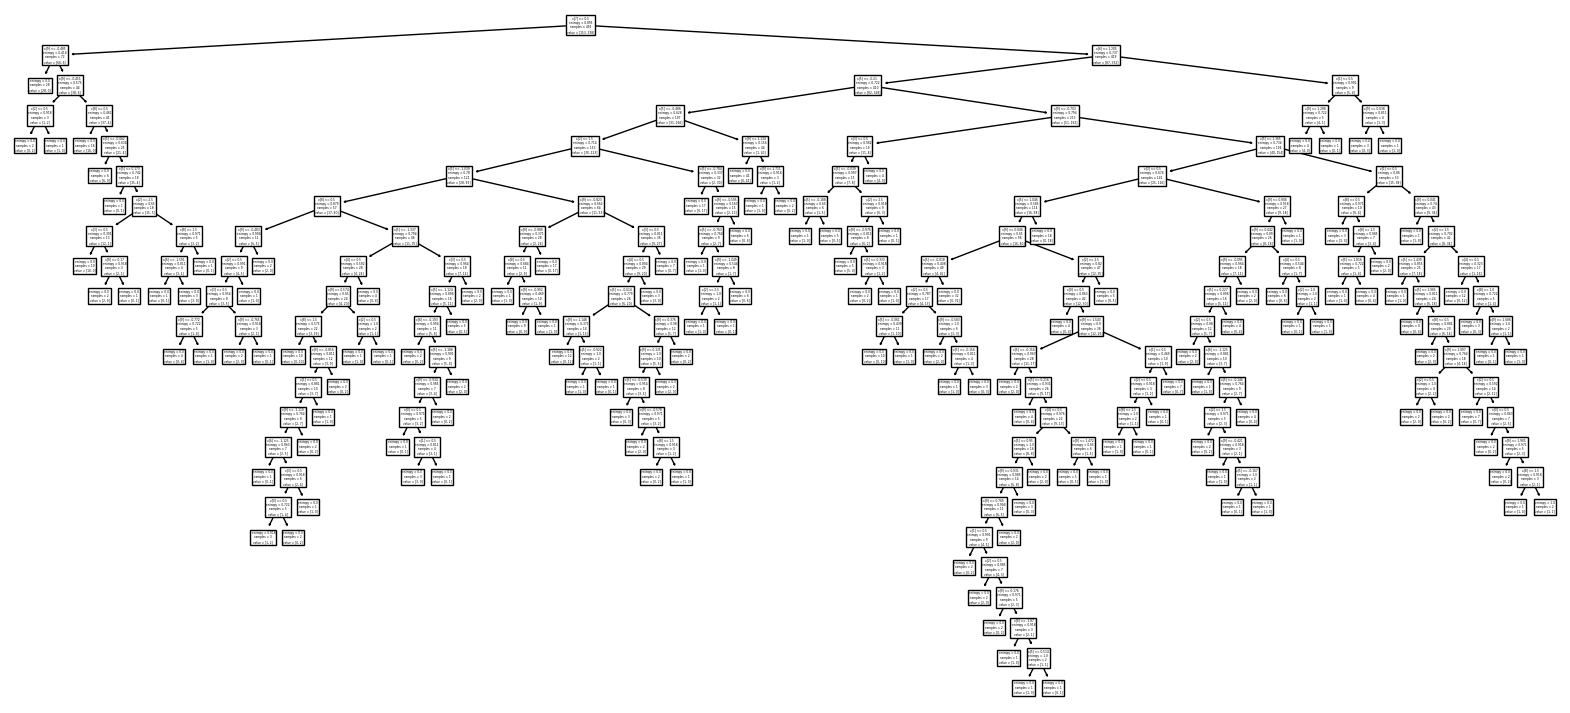

In [48]:
from sklearn import tree
plt.figure(figsize = (20,9))
tree.plot_tree(clf)
plt.show

## Random Forest

In [49]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf .fit(X_train, y_train)
print('Random Forest : {:,.2f}%'.format(rf_clf .score(X_test,y_test)*100))

Random Forest : 76.42%


## Bagging (Bagging meta-estimator)

In [50]:
#Bagging with Decision Tree
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator = tree, n_estimators = 100, random_state = 1)
bagging_clf.fit(X_train,y_train)
y_pred = bagging_clf.predict(X_test)
print('Bagging : {:,.2f}%'.format(bagging_clf.score(X_test,y_test)*100))

Bagging : 80.49%


In [51]:
#Bagging with SVM
from sklearn.svm import SVC
svm = SVC(gamma='auto',random_state = 42,probability=True)
bagging_svm = BaggingClassifier(base_estimator=svm, n_estimators=100, random_state=1)
bagging_svm.fit(X_train,y_train)
print('SVM Bagging  :, {:,.2f}%'.format(bagging_svm.score(X_test,y_test)*100))

SVM Bagging  :, 79.67%


In [52]:
#Bagging with RandomForestClassifier
bagging_rf = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1))
bagging_rf.fit(X_train,y_train)
print('RandomForest Bagging :, {:,.2f}%'.format(bagging_rf.score(X_test,y_test)*100))

RandomForest Bagging :, 78.86%


In [53]:
#Bagging with LogisticRegression
from sklearn.linear_model import LogisticRegression
bagging_lg = BaggingClassifier(base_estimator=LogisticRegression(random_state=1))
bagging_lg.fit(X_train,y_train)
print('LogisticRegression Bagging :, {:,.2f}%'.format(bagging_lg.score(X_test,y_test)*100))

LogisticRegression Bagging :, 80.49%


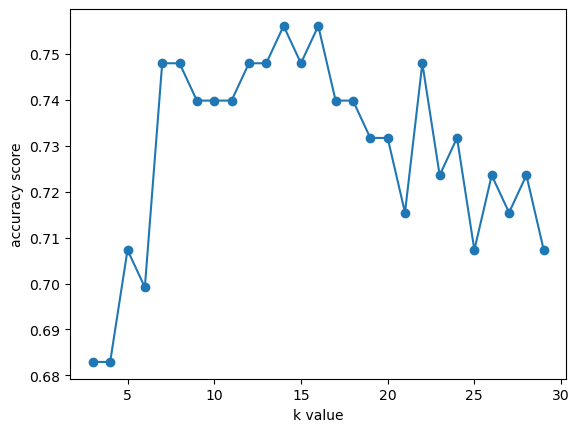

In [54]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
metric_k = []
neighbors = np.arange(3,30)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p=2) #p=1 manhattan,p=2 euclidian
  classifier.fit(X_train,y_train)
  y_pred_knn = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.show()

In [55]:
#Bagging with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=12))
bagging_knn.fit(X_train,y_train)
print('KNeighbors Bagging :, {:,.2f}%'.format(bagging_knn.score(X_test,y_test)*100))

KNeighbors Bagging :, 74.80%


## Ada Boost 

In [56]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)
print(' AdaBoost : {:,.2f}%'.format(ada_clf.score(X_test,y_test)*100))

 AdaBoost : 78.05%


## Gradient Boosting (GBM)

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=1)
grad_boost_clf.fit(X_train,y_train)
print('Gradient Boosting :, {:,.2f}%'.format(grad_boost_clf.score(X_test,y_test)*100))

Gradient Boosting :, 79.67%


## XGBoost

In [58]:
import xgboost as xgb
xg_boost_clf = xgb.XGBClassifier()
xg_boost_clf.fit(X_train,y_train)
print('XGBoost : {:,.2f}%'.format(xg_boost_clf.score(X_test,y_test)*100))

XGBoost : 76.42%
